## Linear map
เราจะทดลองเกี่ยวกับการแปลงแบบเชิงเส้น

### ข้อมูลทดสอบ
เราจะโหลดเซตของเวกเตอร์ในสองมิติเพื่อทดสอบ ข้อมูลนี้อยู่ในไฟล์ `face.txt`

In [1]:
def load_face():
    vectors = []
    for line in open('face.txt').readlines():
        items = line.strip().split()
        vectors.append([float(items[0]), float(items[1])])
    return vectors

fvectors = load_face()

In [2]:
# ในกิจกรรมนี้เราจะ plot แบบ scatter เป็นหลัก
import matplotlib.pyplot as plt

def plot_scatter(vectors):
    vectors = list(vectors)
    xx = [v[0] for v in vectors]
    yy = [v[1] for v in vectors]
    xmin, xmax = min(xx), max(xx)
    ymin, ymax = min(yy), max(yy)
    
    if ymin > 0: ymin = 0
    if ymax < 0: ymax = 0
    if xmin > 0:xmin = 0
    if xmax < 0:xmax = 0
    
    plt.axis([xmin - 1, xmax + 1, ymin - 1, ymax + 1])
    plt.scatter(xx,yy)
    plt.show()

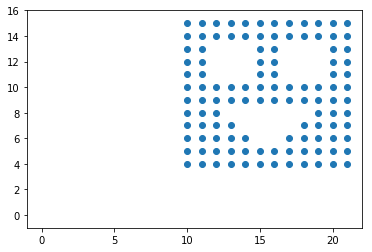

In [3]:
plot_scatter(fvectors)

### ทบทวนฟังก์ชัน `map`

เราจะเขียนฟังก์ชัน `swapcor` ที่สลับพิกัดแกน x และ y

In [10]:
def swapcor(v):
    return [v[1],v[0]]

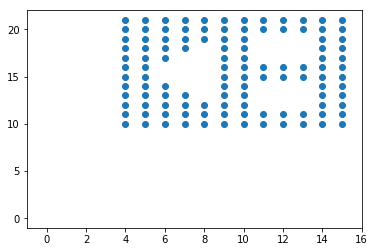

In [11]:
# ด้านล่างเป็นตัวอย่างการใช้ฟังก์ชัน map ในการ apply function f ในสมาชิกทุกตัวใน fvectors

plot_scatter(list(map(swapcor, fvectors)))

### >>> งาน 1 เขียนฟังก์ชันคูณเมตริกซ์ด้วยเวกเตอร์

ให้เขียนฟังก์ชัน `mvmult` ที่รับเมตริกซ์ `mat` ขนาด 2x2 และเวกเตอร์ `v` ที่มีขนาด 2 และคืนผลคูณเป็นเวกเตอร์ขนาด 2

In [12]:
def mvmult(mat,v):
    return [mat[0][0]*v[0]+mat[0][1]*v[1], mat[1][0]*v[0]+mat[1][1]*v[1]]

ทดสอบโดยกดคำนวณค่าด้านล่างแล้วเทียบคำตอบ ผลลัพธ์ที่ได้ควรจะเป็น

    [10, 20]
    [58, 80]
    [-10, -56]
    [660, 1530]

In [13]:
print(mvmult([[1, 0],
              [0, 1]],
             [10, 20]))
print(mvmult([[2, 1],
              [1, 2]],
             [12, 34]))
print(mvmult([[2, -1],
              [1, -2]],
             [12, 34]))
print(mvmult([[21, 12],
              [-34, 57]],
             [12, 34]))

[10, 20]
[58, 80]
[-10, -56]
[660, 1530]


### ทดสอบการแปลงโดยการคูณเมตริกซ์

เราจะทดลองการแปลงด้วยการคูณเวกเตอร์ด้วยเมตริกซ์

    [[2, 1],
     [0, 1]]
     
ทดลองกดรัน

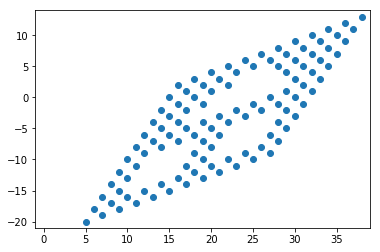

In [16]:
A0 = [[2, -1],
              [1, -2]]
def test_map(v):
    return mvmult(A0,v)

# ทดลอง plot ได้สองแบบ 
# แบบแรก - plot เฉพาะเวกเตอร์หลังแปลงแล้ว
# plot_scatter(list(map(test_map, fvectors)))
# แบบที่สอง - plot เวกเตอร์ก่อนและหลังแปลง
# plot_scatter(fvectors + list(map(test_map, fvectors)))
# อย่าลืมสังเกตว่าในการ plot จะมีการปรับสเกลของแกนให้อัตโนมัติ บางทีรูปที่เห็นไม่เปลี่ยนแปลงเวกเตอร์เปลี่ยนไปแล้วก็ได้

plot_scatter(list(map(test_map, fvectors)))

### >>> งาน 2 ทดลองเปลี่ยนเมตริกซ์ต่าง ๆ

ให้ทดลองเปลียนเมตริกซ์ `A0` ด้านบนเป็นเมตริกซ์ 2x2 ต่าง ๆ แล้วทดลองสังเกตการเปลี่ยนแปลง

### >>> งาน 3 เขียนเมตริกซ์ที่ทำงานเหมือน `swapcor`

ให้เขียนเมตริกซ์ `A1` ที่เมื่อคูณกับเวกเตอร์แล้วทำงานเหมือน `swapcor` นั่นคือสลับแกน

In [23]:
# define A1 here
A1 = [[0, 1],
      [1, 0]]

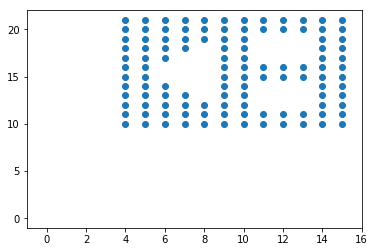

In [24]:
# test A1 here
def new_swapcor(v):
    return mvmult(A1,v)

plot_scatter(list(map(new_swapcor, fvectors)))

### >>> งาน 4 หมุนรูป

เราจะพิจารณาการหมุนเวกเตอร์ (rotate) ไปในทิศทางทวนเข็มนาฬิกา 15 องศา  เราต้องการหาเมตริกซ์ `B` ที่ทำงานดังกล่าว 

วิธีการหาเมตริกซ์ดังกล่าว เราจะพิจารณาการหมุนแยกทีละแกนดังนี้

**ขั้นที่ 1** พิจารณาเวกเตอร์ `[1, 0]` (เวกเตอร์หนึ่งหน่วยที่ขนานกับแกน x)  ถ้าเราหมุนทวนเข็มนาฬิกา 15 องศา เวกเตอร์นี้จะเปลี่ยนไปที่จุดใด  ให้ระบุเป็นเวกเตอร์ `v1` ด้านล่าง

In [25]:
import math
v1 = [math.cos(math.radians(15)),math.sin(math.radians(15))]

**ขั้นที่ 2** พิจารณาเวกเตอร์ `[0, 1]` (เวกเตอร์หนึ่งหน่วยที่ขนานกับแกน y)  ถ้าเราหมุนทวนเข็มนาฬิกา 15 องศา เวกเตอร์นี้จะเปลี่ยนไปที่จุดใด  ให้ระบุเป็นเวกเตอร์ `v2` ด้านล่าง

In [26]:
v2 = [math.cos(math.radians(105)),math.sin(math.radians(105))]

เราจะใช้ใช้การตีความว่าการคูณเมตริกซ์ด้วยเวกเตอร์คือ linear combination ของคอลัมน์

ถ้าให้เวกเตอร์ $p$ แทนจุด (แทนด้วยเวกเตอร์ `[x, y]`) เราสามารถพิจารณาการคูณ $p$ ด้วยเมตริกซ์ $A$ ที่ประกอบไปด้วยสองคอลัมน์ $V_1$ และ $V_2$ ได้ดังนี้

$    Ap
    =
    \left[
      \begin{array}{c|c}
        & \\
        V_1 & V_2 \\
        &
      \end{array}
      \right]
    \begin{bmatrix}
      x \\
      y
    \end{bmatrix}
    =
    \left[
      \begin{array}{c|c}
        & \\
        V_1 & V_2 \\
        &
      \end{array}
      \right]
    \begin{bmatrix}
      x \\
      0
    \end{bmatrix}
    +
    \left[
      \begin{array}{c|c}
        & \\
        V_1 & V_2 \\
        &
      \end{array}
      \right]
    \begin{bmatrix}
      0 \\
      y
    \end{bmatrix}
    =
    \left[
      \begin{array}{c}
        \\
        V_1 \\
        \\
      \end{array}
      \right]
    x
    +
    \left[
      \begin{array}{c}
        \\
        V_2 \\
        \\
      \end{array}
      \right]
    y
$

จากแนวคิดดังกล่าว เราจึงนิยามเมตริกซ์ `R` สำหรับหมุนได้ดังนี้

In [27]:
R = [[v1[0], v2[0]],
     [v1[1], v2[1]]]

ให้ทดลองหมุนด้วยเมตริกซ์ดังกล่าว ตรวจสอบด้วยว่าการหมุนถูกต้อง

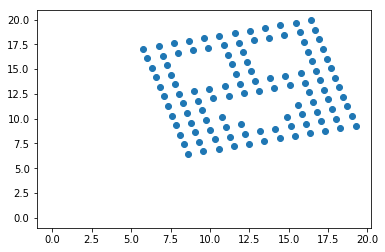

In [31]:
# ทดลองหมุน
def rotate(v):
    return mvmult(R,v)

plot_scatter(list(map(rotate, fvectors)))

### >>> งาน 5 หมุนทั่วไป

ให้เขียนฟังก์ชัน `vrotate` สำหรับหมุนทั่วไปด้านล่างให้สมบูรณ์  ฟังก์ชันจะรับมุมเป็นเรเดียน และหมุนตามเข็มนาฬิกา

ให้แก้เฉพาะบรรทัดที่ระบุเมตริกซ์ R1 เท่านั้น   หมายเหตุใน python ถ้าต้องการใช้ฟังก์ชันคณิตศาสตร์ เช่น sin, cos ต้อง import math ก่อน

In [35]:
import math

def vrotate(v, angle):
    R1 = [[math.cos(angle),math.cos(angle+(math.pi/2))],
          [math.sin(angle),math.sin(angle+(math.pi/2))]]
    return mvmult(R1,v)

ทดลองฟังก์ชันที่เขียน โดยแก้ฟังก์ชัน `test_vrotate` ด้านล่างให้ลองหมุนด้วยมุมต่าง ๆ 

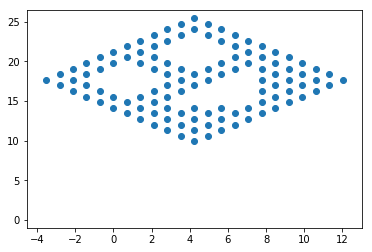

In [41]:
# ทดลองหมุน
def test_vrotate(v):
    return vrotate(v, math.pi*0.25)

plot_scatter(list(map(test_vrotate, fvectors)))